In [212]:
import pandas as pd
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [213]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.


Возраст (лет)	Мужчины	   Женщины
- до 20	       | 123/76 |  116/72
- 21-30	       | 126/79 |  120/75
- 31-40	       | 129/81 |  127/80
- 41-50	       | 135/83 |  137/84
- 51-60	       | 142/85 |  144/85
- 61 и старше  |142/80	|  159/85

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [214]:
def get_trestbps_mean(row):    
    if row['sex'] == 1:
        if row['age'] < 21:
            return '123'
        elif 20 < row['age'] < 31:
            return '126'
        elif 30 < row['age'] < 41:
            return '129'
        elif 40 < row['age'] < 51:
            return '135'
        else:
            return '142'
    else:
        if row['age'] < 21:
            return '116'
        elif 20 < row['age'] < 31:
            return '120'
        elif 30 < row['age'] < 41:
            return '127'
        elif 40 < row['age'] < 51:
            return '137'
        elif 50 < row['age'] < 61:
            return '144'
        else:
            return '159'
# подаем строку в функцию и создаем новый признак 
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)
m =  heart['trestbps_mean'][300]
print(f'значение признака trestbps_mean для пациента под номером 300 -  {m}') 

значение признака trestbps_mean для пациента под номером 300 -  142


Задание 8.3

Проанализируйте датасет и выберите категориальные признаки.

In [215]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    object 
dtypes: float64(1), int64(14), object(1)
memory usage: 38.0+ KB


Задание 8.5

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

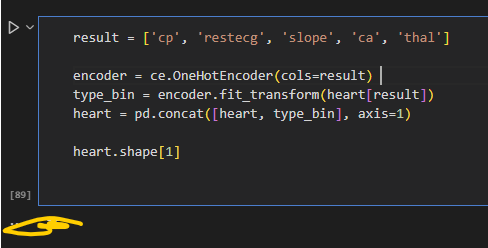


In [216]:
import category_encoders as ce # импорт для работы с кодировщиком
result = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=result) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart[result])
heart = pd.concat([heart, type_bin], axis=1)
# удаляем исходные признаки
heart = heart.drop(result, axis=1)
heart.shape[1]


30

Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

Подсказка (1 из 1): Для необработанных данных следует использовать RobustScaler.

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.672748,0.876907,0.816232,0.704774,0.725672
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.629630,3.500000,5.102362,1.507692,3.375000


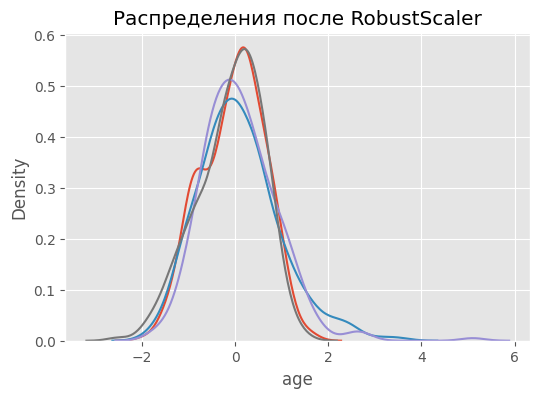

In [217]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# для нормализации, стандартизации
from sklearn import preprocessing
%matplotlib inline
matplotlib.style.use('ggplot')

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
# resul = list(heart.columns)
result=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart[result], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=result) 

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['age'], ax=ax1)
sns.kdeplot(df_r['trestbps'], ax=ax1)
sns.kdeplot(df_r['chol'], ax=ax1)
sns.kdeplot(df_r['thalach'], ax=ax1)
# смотрим описательные статистики, ответ 0.816232
df_r.describe()

In [218]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    object 
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

<Axes: >

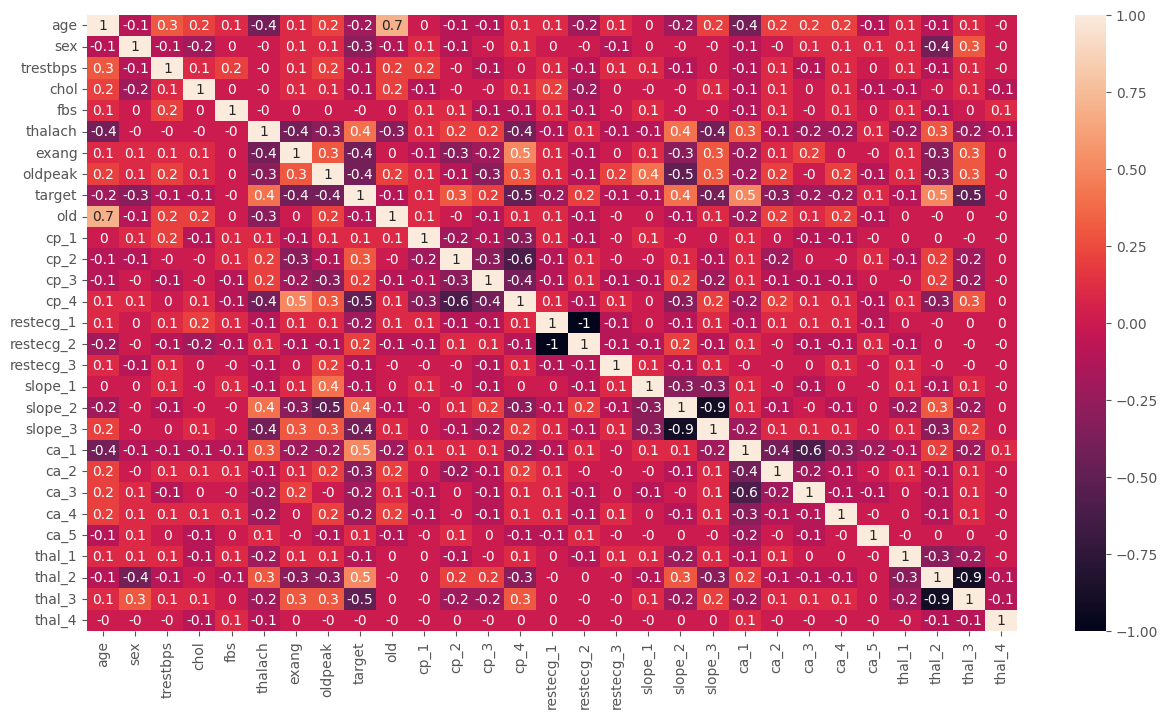

In [220]:
import seaborn as sns # импортируем seaborn для построения графиков
plt.figure(figsize=(15,8))
sns.heatmap(heart.corr(numeric_only=True).round(1), annot=True) # включаем отображение коэффициентов